# 서울 아파트 실거래 데이터 시각화

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams["axes.unicode_minus"] = False
plt.rc("font", family="Malgun Gothic")

In [3]:
df = pd.read_csv("seoul_apart_02.csv")
df.head()

,시군구,단지명,전용면적(평),계약년월,계약일,거래금액(만원),층,건축년도,구,동,유형,계약월,계약요일,평당금액
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,24.23,202204,2022.4.12,220000,4,1987.0,강남구,개포동,중형,4,화,9079.65
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,24.23,202204,2022.4.21,220000,2,1987.0,강남구,개포동,중형,4,목,9079.65
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,24.23,202205,2022.5.27,216000,2,1987.0,강남구,개포동,중형,5,금,8914.57
3,서울특별시 강남구 개포동,개포래미안포레스트,31.01,202204,2022.4.1,369000,13,2020.0,강남구,개포동,대형,4,금,11899.39
4,서울특별시 강남구 개포동,개포래미안포레스트,41.23,202205,2022.5.2,420000,17,2020.0,강남구,개포동,대형,5,월,10186.76


### 전체 데이터의 거래금액을 히스토그램으로 그려보세요
* sns.histplot() 사용
* 인자는 `데이터`, `bins`만 사용
* 'bins'는 30으로 설정

<Axes: xlabel='거래금액(만원)', ylabel='Count'>

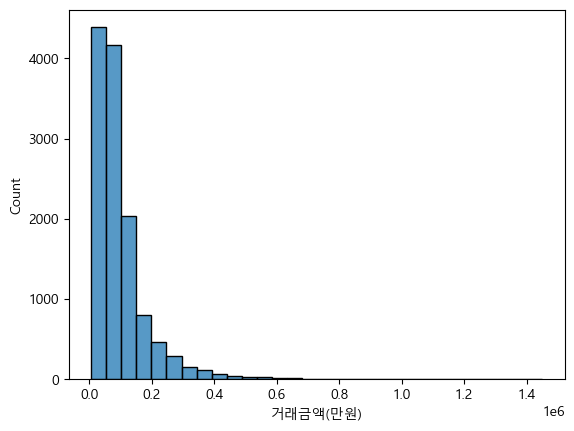

In [16]:
sns.histplot(data=df["거래금액(만원)"],
                bins = 30,
                )
                

In [17]:
# 월별 부동산 거래의 평당금액 평균값 확인 
df.groupby("계약일")["평당금액"].mean()

계약일
2022.1.1     4128.132500
2022.1.10    3685.749143
2022.1.11    4880.729048
2022.1.12    4251.227619
2022.1.13    2998.159750
                ...     
2022.9.5     4301.931538
2022.9.6     4574.827500
2022.9.7     4178.634815
2022.9.8     4995.886000
2022.9.9     4609.823333
Name: 평당금액, Length: 364, dtype: float64

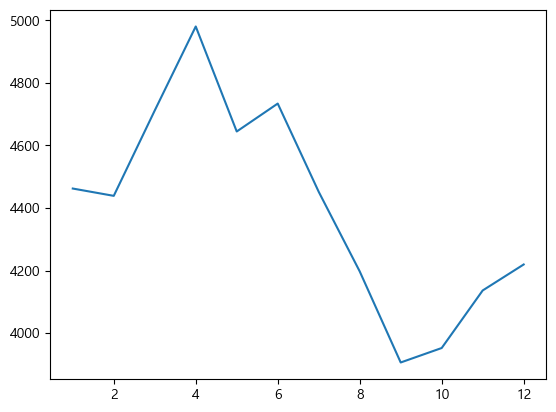

In [19]:
mon_price = df.groupby("계약월")[["평당금액"]].mean()
mon_price

plt.plot(mon_price["평당금액"])

### 월별 아파트 실거래 계약건수를 막대그래프로 그려보세요
● sns.countplot()을 활용
● 인자는 data. x만 사용

C:\Users\Admin\AppData\Local\Temp\ipykernel_21488\2565779490.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


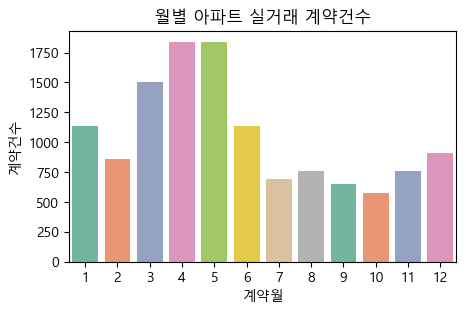

In [28]:
plt.figure(figsize=(5, 3))

sns.countplot(
    data=df,
    x="계약월",
    palette="Set2" 
)

plt.title("월별 아파트 실거래 계약건수")
plt.xlabel("계약월")
plt.ylabel("계약건수")
plt.show()

<Axes: xlabel='평당금액', ylabel='Count'>

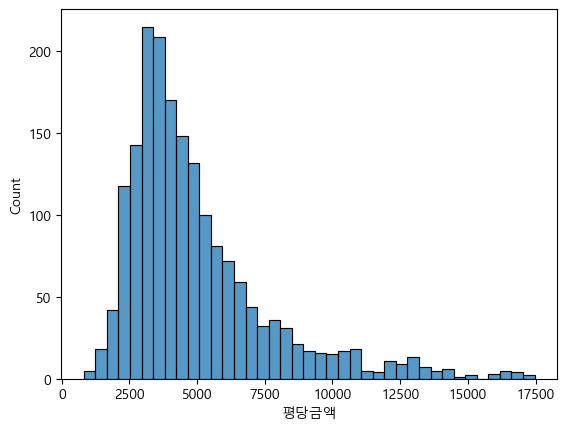

In [30]:
# 4월에 거래된 매물의 평당금액의 분포를 히스토그램으로 그리기
sns.histplot(data=df[df["계약월"]==4]["평당금액"])

In [ ]:
# 지역(구)별 거래금액을 비교하기 위한 막대그래프
plt.figure(figsize=(15,8))
plt.title("지역구별 평균 평당금액")
sns.barplot(data=df,x="구")